In [1]:
# You'll start seeing this cell in most lectures.
# It exists to hide all of the import statements and other setup
# code we need in lecture notebooks.
from dsc80_utils import *

# Lecture 2 – DataFrame Fundamentals

## DSC 80, Fall 2024

### Announcements 📣

- Lab 1 is released, and is due **Friday, Sept 4 at 11:59pm**.
    - See the [Tech Support](https://dsc80.com/tech_support/) page for instructions and watch [this video 🎥](https://www.loom.com/share/0ea254b85b2745e59322b5e5a8692e91?sid=d64a6a06-b2ca-4290-babc-be6666425d09) for tips on how to set up your environment and work on assignments.
    - Please try to set up your computer ASAP so that you have enough time to debug your environment.
- Project 1 will be released by Wednesday.
- Please fill out the [Welcome Survey](https://forms.gle/9JdiAnu75D7T7MAu7) **ASAP**.
- Lecture recordings are available [here](https://podcast.ucsd.edu), and are linked on the course website.

### Agenda

- `numpy` arrays.
- From `babypandas` to `pandas`.
    - Deep dive into DataFrames.
- Accessing subsets of rows and columns in DataFrames.
    - `.loc` and `.iloc`.
    - Querying (i.e. filtering).
- Adding and modifying columns.
- `pandas` and `numpy`.
    
We can't cover every single detail! The [`pandas` documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) will be your friend.

### Throughout lecture, ask questions!

- You're always free to ask questions during lecture, and I'll try to stop for them frequently.
- But, you may not feel like asking your question out loud.
- You can **type your questions throughout lecture** at the following link:

<div class="alert alert-warning" align=center>
    <h3><a href="http://dsc80.com/q">dsc80.com/q</a></h3>
    <h4>Bookmark it!</h4>
</div>

- I'll check the form responses periodically.
- You'll also use this form to answer questions that I ask you during lecture.

<div class="alert alert-warning">
    <h3>Question 🤔 (Answer at <a href="http://dsc80.com/q">dsc80.com/q)</h3>
</div>

In [2]:
dogs = pd.read_csv('data/dogs43.csv')
dogs.head(2)

,breed,kind,lifetime_cost,longevity,size,weight,height
0,Brittany,sporting,22589.0,12.92,medium,35.0,19.0
1,Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0


**What does this code do?**

In [3]:
whoa = np.random.choice([True, False], size=len(dogs))
(dogs[whoa]
 .groupby('size')
 .max()
 .get('longevity')
)

size
large     11.92
medium    13.58
small     16.50
Name: longevity, dtype: float64

## `numpy` arrays

### `numpy` overview

- `numpy` stands for "numerical Python". It is a commonly-used Python module that enables **fast** computation involving arrays and matrices.
- `numpy`'s main object is the **array**. In `numpy`, arrays are:
    - Homogenous – all values are of the same type.
    - (Potentially) multi-dimensional.
- Computation in `numpy` is fast because:
    - Much of it is implemented in C.
    - `numpy` arrays are stored more efficiently in memory than, say, Python lists. 
- [This site](https://cloudxlab.com/blog/numpy-pandas-introduction/) provides a good overview of `numpy` arrays.

We used `numpy` in DSC 10 to work with sequences of data:

In [4]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [5]:
# The shape (10,) means that the array only has a single dimension,
# of size 10.
arr.shape

(10,)

In [6]:
2 ** arr

array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512])

Arrays come equipped with several handy methods; some examples are below, but you can read about them all [here](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html).

In [7]:
(2 ** arr).sum()

np.int64(1023)

In [8]:
(2 ** arr).mean()

np.float64(102.3)

In [9]:
(2 ** arr).max()

np.int64(512)

In [10]:
(2 ** arr).argmax()

np.int64(9)

### ⚠️ The dangers of `for`-loops

- `for`-loops are slow when processing large datasets. **You will rarely write `for`-loops in DSC 80 (except for Lab 1 and Project 1), and may be penalized on assignments for using them when unnecessary!**
- One of the biggest benefits of `numpy` is that it supports **vectorized** operations. 
    - If `a` and `b` are two arrays of the same length, then `a + b` is a new array of the same length containing the element-wise sum of `a` and `b`.
- To illustrate how much faster `numpy` arithmetic is than using a `for`-loop, let's compute the squares of the numbers between 0 and 1,000,000:
    - Using a `for`-loop.
    - Using vectorized arithmetic, through `numpy`.

In [11]:
%%timeit
squares = []
for i in range(1_000_000):
    squares.append(i * i)

30.3 ms ± 294 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In vanilla Python, this takes about 0.04 seconds per loop.

In [12]:
%%timeit
squares = np.arange(1_000_000) ** 2

1.2 ms ± 131 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In `numpy`, this only takes about 0.001 seconds per loop, more than 40x faster! Note that under the hood, `numpy` is also using a `for`-loop, but it's a `for`-loop implemented in C, which is much faster than Python.

### Multi-dimensional arrays

While we didn't see these very often in DSC 10, multi-dimensional lists/arrays may have since come up in DSC 20, 30, or 40A (especially in the context of linear algebra).

We'll spend a bit of time talking about 2D (and 3D) arrays here, since in some ways, they behave similarly to DataFrames. 

Below, we create a 2D array from scratch.

In [13]:
nums = np.array([
    [5, 1, 9, 7],
    [9, 8, 2, 3],
    [2, 5, 0, 4]
])

nums

array([[5, 1, 9, 7],
       [9, 8, 2, 3],
       [2, 5, 0, 4]])

In [14]:
# nums has 3 rows and 4 columns.
nums.shape

(3, 4)

We can also create 2D arrays by _reshaping_ other arrays.

In [15]:
# Here, we're asking to reshape np.arange(1, 7)
# so that it has 2 rows and 3 columns.
a = np.arange(1, 7).reshape((2, 3))
a

array([[1, 2, 3],
       [4, 5, 6]])

### Operations along axes

In 2D arrays (and DataFrames), axis 0 refers to the rows (up and down) and axis 1 refers to the columns (left and right).

<center><img src='imgs/axis-sum.png' width=600></center>

In [16]:
a

array([[1, 2, 3],
       [4, 5, 6]])

If we specify `axis=0`, `a.sum` will "compress" along axis 0.

In [17]:
a.sum(axis=0)

array([5, 7, 9])

If we specify `axis=1`, `a.sum` will "compress" along axis 1.

In [18]:
a.sum(axis=1)

array([ 6, 15])

### Selecting rows and columns from 2D arrays

You can use `[`square brackets`]` to **slice** rows and columns out of an array, using the same slicing conventions you saw in DSC 20.

In [19]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [20]:
# Accesses row 0 and all columns.
a[0, :]

array([1, 2, 3])

In [21]:
# Same as the above.
a[0]

array([1, 2, 3])

In [22]:
# Accesses all rows and column 1.
a[:, 1]

array([2, 5])

In [23]:
# Accesses row 0 and columns 1 and onwards.
a[0, 1:]

array([2, 3])

<div class="alert alert-warning">
    <h3>Question 🤔 (Answer at <a href="http://dsc80.com/q">dsc80.com/q)</h3>
        
Try and predict the value of <code>grid[-1, 1:].sum()</code> without running the code below.
</div>

In [24]:
s = (5, 3)
grid = np.ones(s) * 2 * np.arange(1, 16).reshape(s)
# grid[-1, 1:].sum()

<div class="alert alert-warning">
    <h3>Question 🤔 (Answer at <a href="http://dsc80.com/q">dsc80.com/q)</h3>
        
<b>Ask <a href="https://chat.openai.com/">ChatGPT</a>:</b>
    
1. To explain what the code above does.
2. To tell you what the code outputs.
</div>

### Example: Image processing

`numpy` arrays are homogenous and potentially multi-dimensional.

It turns out that **images** can be represented as 3D `numpy` arrays. The color of each pixel can be described with three numbers under the RGB model – a red value, green value, and blue value. Each of these can vary from 0 to 1.

<center><img src='imgs/three_d_array.png' width=250><small>(<a href="https://e2eml.school/convert_rgb_to_grayscale">image source</a>)</small></center>

In [25]:
from PIL import Image
img_path = Path('imgs') / 'bentley.jpg'
img = np.asarray(Image.open(img_path)) / 255

In [26]:
img

array([[[0.4 , 0.33, 0.24],
        [0.42, 0.35, 0.25],
        [0.43, 0.36, 0.26],
        ...,
        [0.5 , 0.44, 0.36],
        [0.51, 0.44, 0.36],
        [0.51, 0.44, 0.36]],

       [[0.39, 0.33, 0.23],
        [0.42, 0.36, 0.26],
        [0.44, 0.37, 0.27],
        ...,
        [0.51, 0.44, 0.36],
        [0.52, 0.45, 0.37],
        [0.52, 0.45, 0.38]],

       [[0.38, 0.31, 0.21],
        [0.41, 0.35, 0.24],
        [0.44, 0.37, 0.27],
        ...,
        [0.52, 0.45, 0.38],
        [0.53, 0.46, 0.39],
        [0.53, 0.47, 0.4 ]],

       ...,

       [[0.71, 0.64, 0.55],
        [0.71, 0.65, 0.55],
        [0.68, 0.62, 0.52],
        ...,
        [0.58, 0.49, 0.41],
        [0.56, 0.47, 0.39],
        [0.56, 0.47, 0.39]],

       [[0.5 , 0.44, 0.34],
        [0.42, 0.37, 0.26],
        [0.44, 0.38, 0.28],
        ...,
        [0.4 , 0.33, 0.25],
        [0.55, 0.48, 0.4 ],
        [0.58, 0.5 , 0.42]],

       [[0.38, 0.33, 0.22],
        [0.49, 0.44, 0.33],
        [0.56, 0

In [27]:
img.shape

(200, 263, 3)

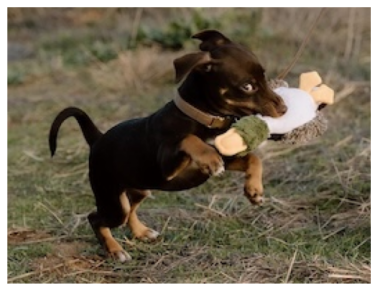

In [28]:
plt.imshow(img)
plt.axis('off');

### Applying a greyscale filter

One way to convert an image to greyscale is to average its red, green, and blue values.

In [29]:
mean_2d = img.mean(axis=2)
mean_2d

array([[0.32, 0.34, 0.35, ..., 0.43, 0.44, 0.44],
       [0.31, 0.35, 0.36, ..., 0.44, 0.45, 0.45],
       [0.3 , 0.33, 0.36, ..., 0.45, 0.46, 0.47],
       ...,
       [0.64, 0.64, 0.6 , ..., 0.49, 0.47, 0.47],
       [0.43, 0.35, 0.37, ..., 0.32, 0.48, 0.5 ],
       [0.31, 0.42, 0.49, ..., 0.07, 0.21, 0.34]])

This is just a single red channel!

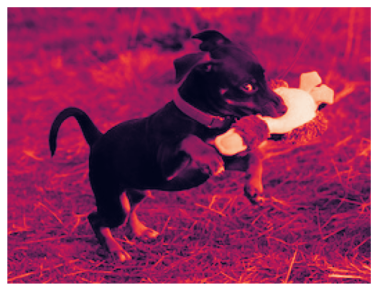

In [30]:
plt.imshow(mean_2d)
plt.axis('off');

We need to _repeat_ `mean_2d` three times along axis 2, to use the same values for the red, green, and blue channels. `np.repeat` will help us here.

In [31]:
# np.newaxis is an alias for None.
# It helps us introduce an additional axis.
np.arange(5)[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [32]:
np.repeat(np.arange(5)[:, np.newaxis], 3, axis=1)

array([[0, 0, 0],
       [1, 1, 1],
       [2, 2, 2],
       [3, 3, 3],
       [4, 4, 4]])

In [33]:
mean_3d = np.repeat(mean_2d[:, :, np.newaxis], 3, axis=2)

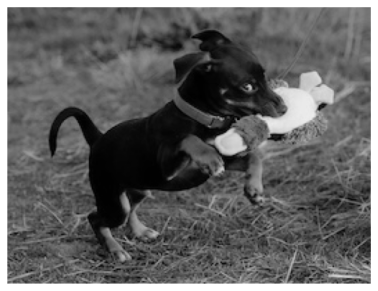

In [34]:
plt.imshow(mean_3d)
plt.axis('off');

### Applying a sepia filter

Let's sepia-fy Junior!

<center>
<img src="imgs/apple-sepia.png" width=50%>
    <small>
(<a href="https://support.apple.com/guide/motion/sepia-filter-motn169f8c87/mac">Image credits</a>)</small>
</center>

From [here](https://stackoverflow.com/questions/1061093/how-is-a-sepia-tone-created), we can apply this conversion to each pixel.

$$\begin{align*}
R_{\text{sepia}} &= 0.393R + 0.769G + 0.189B \\ G_{\text{sepia}} &= 0.349R + 0.686G + 0.168B \\
B_{\text{sepia}} &= 0.272R + 0.534G + 0.131B\end{align*}$$

In [35]:
sepia_filter = np.array([
    [0.393, 0.769, 0.189],
    [0.349, 0.686, 0.168],
    [0.272, 0.534, 0.131]
])

In [36]:
# Multiplies each pixel by the sepia_filter matrix.
# Then, clips each RGB value to be between 0 and 1.
filtered = (img @ sepia_filter.T).clip(0, 1)
filtered

array([[[0.46, 0.41, 0.32],
        [0.48, 0.43, 0.33],
        [0.5 , 0.44, 0.35],
        ...,
        [0.6 , 0.53, 0.42],
        [0.6 , 0.54, 0.42],
        [0.61, 0.54, 0.42]],

       [[0.45, 0.4 , 0.31],
        [0.49, 0.43, 0.34],
        [0.5 , 0.45, 0.35],
        ...,
        [0.61, 0.54, 0.42],
        [0.62, 0.55, 0.43],
        [0.63, 0.56, 0.43]],

       [[0.43, 0.38, 0.3 ],
        [0.47, 0.42, 0.33],
        [0.51, 0.45, 0.35],
        ...,
        [0.63, 0.56, 0.44],
        [0.64, 0.57, 0.44],
        [0.64, 0.57, 0.45]],

       ...,

       [[0.88, 0.78, 0.61],
        [0.89, 0.79, 0.61],
        [0.84, 0.75, 0.58],
        ...,
        [0.68, 0.61, 0.47],
        [0.65, 0.58, 0.45],
        [0.65, 0.58, 0.45]],

       [[0.6 , 0.53, 0.42],
        [0.5 , 0.44, 0.35],
        [0.52, 0.46, 0.36],
        ...,
        [0.45, 0.4 , 0.31],
        [0.66, 0.59, 0.46],
        [0.69, 0.62, 0.48]],

       [[0.45, 0.4 , 0.31],
        [0.59, 0.53, 0.41],
        [0.69, 0

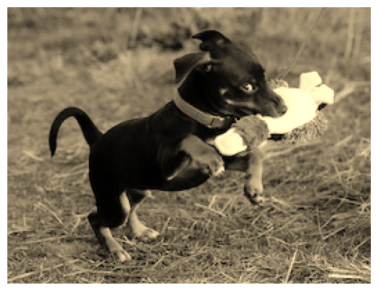

In [37]:
plt.imshow(filtered)
plt.axis('off');

### Key takeaway: avoid `for`-loops whenever possible!

You can do a lot without `for`-loops, both in `numpy` and in `pandas`.

## From `babypandas` to `pandas` 🐼

### `babypandas`

In DSC 10, you used `babypandas`, which was a subset of `pandas` designed to be friendly for beginners.
<center><img src='imgs/babypanda.jpg' width=45%></center>

### pandas

You're not a beginner anymore – you've taken DSC 20, 30, and 40A. You're ready for the real deal.

<center><img src='imgs/angrypanda.jpg' width=60%></center>

Fortunately, **everything you learned in `babypandas` will carry over!**

### `pandas`

<center><img src='imgs/pandas.png' width=200></center>

- `pandas` is **the** Python library for tabular data manipulation.
- Before `pandas` was developed, the standard data science workflow involved using multiple languages (Python, R, Java) in a single project.
- Wes McKinney, the original developer of `pandas`, wanted a library which would allow everything to be done in Python.
    - Python is faster to develop in than Java, and is more general-purpose than R.

### `pandas` data structures

There are three key data structures at the core of `pandas`:
- DataFrame: 2 dimensional tables.
- Series: 1 dimensional array-like object, typically representing a column or row.
- Index: sequence of column or row labels.

<center>
    <img src='imgs/example-df.png' width=400>
    <i>A DataFrame you'll see in Lab 1.</i>
</center>

### Importing `pandas` and related libraries

`pandas` is almost always imported in conjunction with `numpy`.

In [38]:
import pandas as pd
import numpy as np

### Example: Dog Breeds (woof!) 🐶

The dataset we'll work comes from the American Kennel Club. Here's a [cool plot](https://informationisbeautiful.net/visualizations/best-in-show-whats-the-top-data-dog/) made using our dataset.


<center>
    <img src="https://infobeautiful4.s3.amazonaws.com/2014/11/IIB_Best-In-Show_1276x2.png" width=800>
</center>

In [39]:
# You'll see the Path(...) / subpath syntax a lot.
# It creates the correct path to your file, 
# whether you're using Windows, macOS, or Linux.
dog_path = Path('data') / 'dogs43.csv'
dogs = pd.read_csv(dog_path)
dogs

,breed,kind,lifetime_cost,longevity,size,weight,height
0,Brittany,sporting,22589.0,12.92,medium,35.0,19.0
1,Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
2,English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...,...
40,Bullmastiff,working,13936.0,7.57,large,115.0,25.5
41,Mastiff,working,13581.0,6.50,large,175.0,30.0
42,Saint Bernard,working,20022.0,7.78,large,155.0,26.5


### Review: `head`, `tail`, `shape`, `index`, `get`, and `sort_values`

To extract the first or last few rows of a DataFrame, use the `head` or `tail` methods.

In [40]:
dogs.head(3)

,breed,kind,lifetime_cost,longevity,size,weight,height
0,Brittany,sporting,22589.0,12.92,medium,35.0,19.0
1,Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
2,English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0


In [41]:
dogs.tail(2)

,breed,kind,lifetime_cost,longevity,size,weight,height
41,Mastiff,working,13581.0,6.50,large,175.0,30.0
42,Saint Bernard,working,20022.0,7.78,large,155.0,26.5


The `shape` attribute returns the DataFrame's number of rows and columns.

In [42]:
dogs.shape

(43, 7)

In [43]:
# The default index of a DataFrame is 0, 1, 2, 3, ...
dogs.index

RangeIndex(start=0, stop=43, step=1)

We know that we can use `.get()` to select out a column or multiple columns...

In [44]:
dogs.get('breed')

0                   Brittany
1              Cairn Terrier
2     English Cocker Spaniel
               ...          
40               Bullmastiff
41                   Mastiff
42             Saint Bernard
Name: breed, Length: 43, dtype: object

In [45]:
dogs.get(['breed', 'kind', 'longevity'])

,breed,kind,longevity
0,Brittany,sporting,12.92
1,Cairn Terrier,terrier,13.84
2,English Cocker Spaniel,sporting,11.66
...,...,...,...
40,Bullmastiff,working,7.57
41,Mastiff,working,6.50
42,Saint Bernard,working,7.78


Most people don't use `.get` in practice; we'll see the more common technique in a few slides.

And lastly, remember that to sort by a column, use the `sort_values` method. Like most DataFrame and Series methods, `sort_values` returns a new DataFrame, and doesn't modify the original.

In [46]:
# Note that the index is no longer 0, 1, 2, ...!
dogs.sort_values('height', ascending=False)

,breed,kind,lifetime_cost,longevity,size,weight,height
41,Mastiff,working,13581.0,6.50,large,175.0,30.0
36,Borzoi,hound,16176.0,9.08,large,82.5,28.0
34,Newfoundland,working,19351.0,9.32,large,125.0,27.0
...,...,...,...,...,...,...,...
29,Dandie Dinmont Terrier,terrier,21633.0,12.17,small,21.0,9.0
14,Maltese,toy,19084.0,12.25,small,5.0,9.0
8,Chihuahua,toy,26250.0,16.50,small,5.5,5.0


In [47]:
# This sorts by 'height', 
# then breaks ties by 'longevity'.
# Note the difference in the last three rows between
# this DataFrame and the one above.
dogs.sort_values(['height', 'longevity'],
                 ascending=False)

,breed,kind,lifetime_cost,longevity,size,weight,height
41,Mastiff,working,13581.0,6.50,large,175.0,30.0
36,Borzoi,hound,16176.0,9.08,large,82.5,28.0
34,Newfoundland,working,19351.0,9.32,large,125.0,27.0
...,...,...,...,...,...,...,...
14,Maltese,toy,19084.0,12.25,small,5.0,9.0
29,Dandie Dinmont Terrier,terrier,21633.0,12.17,small,21.0,9.0
8,Chihuahua,toy,26250.0,16.50,small,5.5,5.0


Note that `dogs` is not the DataFrame above. To save our changes, we'd need to say something like `dogs = dogs.sort_values...`.

In [48]:
dogs

,breed,kind,lifetime_cost,longevity,size,weight,height
0,Brittany,sporting,22589.0,12.92,medium,35.0,19.0
1,Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
2,English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...,...
40,Bullmastiff,working,13936.0,7.57,large,115.0,25.5
41,Mastiff,working,13581.0,6.50,large,175.0,30.0
42,Saint Bernard,working,20022.0,7.78,large,155.0,26.5


### Setting the index

Think of each row's index as its **unique identifier** or **name**. Often, we like to set the index of a DataFrame to a unique identifier if we have one available. We can do so with the `set_index` method.

In [49]:
dogs.set_index('breed')

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5
Mastiff,working,13581.0,6.50,large,175.0,30.0
Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [50]:
# The above cell didn't involve an assignment statement,
# so dogs was unchanged.
dogs

,breed,kind,lifetime_cost,longevity,size,weight,height
0,Brittany,sporting,22589.0,12.92,medium,35.0,19.0
1,Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
2,English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...,...
40,Bullmastiff,working,13936.0,7.57,large,115.0,25.5
41,Mastiff,working,13581.0,6.50,large,175.0,30.0
42,Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [51]:
# By reassigning dogs, our changes will persist.
dogs = dogs.set_index('breed')
dogs

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5
Mastiff,working,13581.0,6.50,large,175.0,30.0
Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [52]:
# There used to be 7 columns, but now there are only 6!
dogs.shape

(43, 6)

<div class="alert alert-warning">
    <h3>Question 🤔 (Answer at <a href="http://dsc80.com/q">dsc80.com/q)</h3>
        
<b>Ask <a href="https://chat.openai.com/">ChatGPT</a>:</b>
    
- To explain what happens if you have duplicate values in a column and use `set_index()` on it.
</div>

### 💡 Pro-Tip: Displaying more rows/columns

Sometimes, you just want `pandas` to display a lot of rows and columns. You can use this helper function to do that:

In [53]:
from IPython.display import display
def display_df(df, rows=pd.options.display.max_rows, cols=pd.options.display.max_columns):
    """Displays n rows and cols from df."""
    with pd.option_context("display.max_rows", rows,
                           "display.max_columns", cols):
        display(df)

In [54]:
display_df(dogs.sort_values('weight', ascending=False),
           rows=43)

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Mastiff,working,13581.0,6.50,large,175.0,30.00
Saint Bernard,working,20022.0,7.78,large,155.0,26.50
Newfoundland,working,19351.0,9.32,large,125.0,27.00
Bullmastiff,working,13936.0,7.57,large,115.0,25.50
Bloodhound,hound,13824.0,6.75,large,85.0,25.00
Borzoi,hound,16176.0,9.08,large,82.5,28.00
Alaskan Malamute,working,21986.0,10.67,large,80.0,24.00
Rhodesian Ridgeback,hound,16530.0,9.10,large,77.5,25.50
Giant Schnauzer,working,26686.0,10.00,large,77.5,25.50


## Selecting columns

### Selecting columns in `babypandas` 👶🐼

- In `babypandas`, you selected columns using the `.get` method.
- `.get` also works in `pandas`, but it is not **idiomatic** – people don't usually use it.

In [55]:
dogs

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5
Mastiff,working,13581.0,6.50,large,175.0,30.0
Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [56]:
dogs.get('size')

breed
Brittany                  medium
Cairn Terrier              small
English Cocker Spaniel    medium
                           ...  
Bullmastiff                large
Mastiff                    large
Saint Bernard              large
Name: size, Length: 43, dtype: object

In [57]:
# This doesn't error, but sometimes we'd like it to.
dogs.get('size oops!')

### Selecting columns with `[]`

* The standard way to select a column in `pandas` is by using the `[]` operator.
* Specifying a column name returns the column as a Series.
* Specifying a list of column names returns a DataFrame.

In [58]:
dogs

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5
Mastiff,working,13581.0,6.50,large,175.0,30.0
Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [59]:
# Returns a Series.
dogs['kind']

breed
Brittany                  sporting
Cairn Terrier              terrier
English Cocker Spaniel    sporting
                            ...   
Bullmastiff                working
Mastiff                    working
Saint Bernard              working
Name: kind, Length: 43, dtype: object

In [60]:
# Returns a DataFrame.
dogs[['kind', 'size']]

,kind,size
breed,,
Brittany,sporting,medium
Cairn Terrier,terrier,small
English Cocker Spaniel,sporting,medium
...,...,...
Bullmastiff,working,large
Mastiff,working,large
Saint Bernard,working,large


In [61]:
# 🤔
dogs[['kind']]

,kind
breed,
Brittany,sporting
Cairn Terrier,terrier
English Cocker Spaniel,sporting
...,...
Bullmastiff,working
Mastiff,working
Saint Bernard,working


In [62]:
# Breeds are stored in the index, which is not a column!
dogs['breed']

KeyError: 'breed'

In [63]:
dogs.index

Index(['Brittany', 'Cairn Terrier', 'English Cocker Spaniel', 'Cocker Spaniel',
       'Shetland Sheepdog', 'Siberian Husky', 'Lhasa Apso',
       'Miniature Schnauzer', 'Chihuahua', 'English Springer Spaniel',
       'German Shorthaired Pointer', 'Pointer', 'Tibetan Spaniel',
       'Labrador Retriever', 'Maltese', 'Shih Tzu', 'Irish Setter',
       'Golden Retriever', 'Chesapeake Bay Retriever', 'Tibetan Terrier',
       'Gordon Setter', 'Pug', 'Norfolk Terrier', 'English Toy Spaniel',
       'Cavalier King Charles Spaniel', 'Basenji',
       'Staffordshire Bull Terrier', 'Pembroke Welsh Corgi', 'Clumber Spaniel',
       'Dandie Dinmont Terrier', 'Giant Schnauzer', 'Scottish Terrier',
       'Kerry Blue Terrier', 'Afghan Hound', 'Newfoundland',
       'Rhodesian Ridgeback', 'Borzoi', 'Bull Terrier', 'Alaskan Malamute',
       'Bloodhound', 'Bullmastiff', 'Mastiff', 'Saint Bernard'],
      dtype='object', name='breed')

### Useful Series methods

There are a variety of useful methods that work on Series. You can see the entire list [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.html). Many methods that work on a Series will also work on DataFrames, as we'll soon see.

In [64]:
dogs

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5
Mastiff,working,13581.0,6.50,large,175.0,30.0
Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [65]:
# What are the unique kinds of dogs?
dogs['kind'].unique()

array(['sporting', 'terrier', 'herding', 'working', 'non-sporting', 'toy',
       'hound'], dtype=object)

In [66]:
# How many unique kinds of dogs are there?
dogs['kind'].nunique()

7

In [67]:
# What's the distribution of kinds?
dogs['kind'].value_counts()

kind
sporting        12
terrier          8
working          7
toy              6
hound            5
non-sporting     3
herding          2
Name: count, dtype: int64

In [68]:
# What's the mean of the 'longevity' column?
dogs['longevity'].mean()

np.float64(11.340697674418605)

In [69]:
# Tell me more about the 'weight' column.
dogs['weight'].describe()

count     43.00
mean      49.35
std       39.42
          ...  
50%       36.50
75%       67.50
max      175.00
Name: weight, Length: 8, dtype: float64

In [70]:
# Sort the 'lifetime_cost' column. Note that here we're using sort_values on a Series, not a DataFrame!
dogs['lifetime_cost'].sort_values()

breed
Mastiff                       13581.0
Bloodhound                    13824.0
Bullmastiff                   13936.0
                               ...   
German Shorthaired Pointer    25842.0
Chihuahua                     26250.0
Giant Schnauzer               26686.0
Name: lifetime_cost, Length: 43, dtype: float64

In [71]:
# Gives us the index of the largest value, not the largest value itself.
dogs['lifetime_cost'].idxmax()

'Giant Schnauzer'

## Selecting subsets of rows (and columns)

### Use `loc` to _slice_ rows and columns using labels

You saw slicing in DSC 20.

`loc` works similarly to slicing 2D arrays, but it uses row **labels** and column **labels**, not positions.

In [72]:
dogs

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5
Mastiff,working,13581.0,6.50,large,175.0,30.0
Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [73]:
# The first argument is the row label.
#        ↓
dogs.loc['Pug', 'longevity']
#                  ↑
# The second argument is the column label.

np.float64(11.0)

As an aside, `loc` is _not_ a method – it's an indexer.

In [74]:
type(dogs.loc)

pandas.core.indexing._LocIndexer

In [75]:
type(dogs.sort_values)

method

### 💡 Pro-Tip: Using Pandas Tutor

If you want, you can install `pandas_tutor` from `pip` in your Terminal (once you've entered your DSC 80 `mamba` environment):

    pip install pandas_tutor

Then, you can load the extension by adding:

    %reload_ext pandas_tutor

At the top of your notebook. After that, you can render visualizations with the `%%pt` cell magic 🪄:

In [76]:
# Pandas Tutor setup. You'll need to run `pip install pandas_tutor` in your Terminal
# for this cell to work, but you can also ignore the error and continue onward.
%reload_ext pandas_tutor
%set_pandas_tutor_options {"maxDisplayCols": 8, "nohover": True, "projectorMode": True}

In [77]:
%%pt
dogs.loc['Pug', 'longevity']

### `.loc` is flexible 🧘

You can provide a sequence (list, array, Series) as either argument to `.loc`.

In [78]:
dogs

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5
Mastiff,working,13581.0,6.50,large,175.0,30.0
Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [79]:
dogs.loc[['Cocker Spaniel', 'Labrador Retriever'], 'size']

breed
Cocker Spaniel         small
Labrador Retriever    medium
Name: size, dtype: object

In [80]:
dogs.loc[['Cocker Spaniel', 'Labrador Retriever'], ['kind', 'size', 'height']]

,kind,size,height
breed,,,
Cocker Spaniel,sporting,small,14.5
Labrador Retriever,sporting,medium,23.0


In [81]:
# Note that the 'weight' column is included!
dogs.loc[['Cocker Spaniel', 'Labrador Retriever'], 'lifetime_cost': 'weight']

,lifetime_cost,longevity,size,weight
breed,,,,
Cocker Spaniel,24330.0,12.50,small,25.0
Labrador Retriever,21299.0,12.04,medium,67.5


In [82]:
dogs.loc[['Cocker Spaniel', 'Labrador Retriever'], :]

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Cocker Spaniel,sporting,24330.0,12.50,small,25.0,14.5
Labrador Retriever,sporting,21299.0,12.04,medium,67.5,23.0


In [83]:
# Shortcut for the line above.
dogs.loc[['Cocker Spaniel', 'Labrador Retriever']]

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Cocker Spaniel,sporting,24330.0,12.50,small,25.0,14.5
Labrador Retriever,sporting,21299.0,12.04,medium,67.5,23.0


### Review: Querying
- As we saw in DSC 10, querying is the act of selecting rows in a DataFrame that satisfy certain condition(s).
- Comparisons with arrays (or Series) result in Boolean arrays (or Series).
- We can use comparisons along with the `loc` operator to **filter** a DataFrame.

In [84]:
dogs

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5
Mastiff,working,13581.0,6.50,large,175.0,30.0
Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [85]:
dogs.loc[dogs['weight'] < 10]

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Chihuahua,toy,26250.0,16.50,small,5.5,5.0
Maltese,toy,19084.0,12.25,small,5.0,9.0


In [86]:
dogs.loc[dogs.index.str.contains('Retriever')]

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Labrador Retriever,sporting,21299.0,12.04,medium,67.5,23.00
Golden Retriever,sporting,21447.0,12.04,medium,60.0,22.75
Chesapeake Bay Retriever,sporting,16697.0,9.48,large,67.5,23.50


In [87]:
# Because querying is so common, there's a shortcut:
dogs[dogs.index.str.contains('Retriever')]

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Labrador Retriever,sporting,21299.0,12.04,medium,67.5,23.00
Golden Retriever,sporting,21447.0,12.04,medium,60.0,22.75
Chesapeake Bay Retriever,sporting,16697.0,9.48,large,67.5,23.50


In [88]:
# Empty DataFrame – not an error!
dogs.loc[dogs['kind'] == 'beaver']

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,


Note that because we set the index to `'breed'` earlier, we can select rows based on dog breeds without having to query.

In [89]:
dogs

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5
Mastiff,working,13581.0,6.50,large,175.0,30.0
Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [90]:
# Series!
dogs.loc['Maltese']

kind                 toy
lifetime_cost    19084.0
longevity          12.25
size               small
weight               5.0
height               9.0
Name: Maltese, dtype: object

If `'breed'` was instead a column, then we'd need to query to access information about a particular breed.

In [91]:
dogs_reset = dogs.reset_index()
dogs_reset

,breed,kind,lifetime_cost,longevity,size,weight,height
0,Brittany,sporting,22589.0,12.92,medium,35.0,19.0
1,Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
2,English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...,...
40,Bullmastiff,working,13936.0,7.57,large,115.0,25.5
41,Mastiff,working,13581.0,6.50,large,175.0,30.0
42,Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [92]:
# DataFrame!
dogs_reset[dogs_reset['breed'] == 'Maltese']

,breed,kind,lifetime_cost,longevity,size,weight,height
14,Maltese,toy,19084.0,12.25,small,5.0,9.0


### Querying with multiple conditions

Remember, you need parentheses around each condition. Also, you must use the bitwise operators `&` and `|` instead of the standard `and` and `or` keywords. `pandas` makes weird decisions sometimes!

In [93]:
dogs

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5
Mastiff,working,13581.0,6.50,large,175.0,30.0
Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [94]:
dogs[(dogs['weight'] < 20) & (dogs['kind'] == 'terrier')]

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
Miniature Schnauzer,terrier,20087.0,11.81,small,15.5,13.0
Norfolk Terrier,terrier,24308.0,13.07,small,12.0,9.5


### 💡 Pro-Tip: Using `.query`

`.query` is a convenient way to query, since you don't need parentheses and you can use the `and` and `or` keywords.

In [95]:
dogs

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5
Mastiff,working,13581.0,6.50,large,175.0,30.0
Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [96]:
dogs.query('weight < 20 and kind == "terrier"')

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
Miniature Schnauzer,terrier,20087.0,11.81,small,15.5,13.0
Norfolk Terrier,terrier,24308.0,13.07,small,12.0,9.5


In [97]:
dogs.query('kind in ["sporting", "terrier"] and lifetime_cost < 20000')

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
Chesapeake Bay Retriever,sporting,16697.0,9.48,large,67.5,23.5
Gordon Setter,sporting,19605.0,11.10,large,62.5,25.0
Clumber Spaniel,sporting,18084.0,10.00,medium,70.0,18.5
Scottish Terrier,terrier,17525.0,10.69,small,20.0,10.0
Kerry Blue Terrier,terrier,17240.0,9.40,medium,36.5,18.5
Bull Terrier,terrier,18490.0,10.21,medium,60.0,21.5


<div class="alert alert-warning">
    <h3>Question 🤔 (Answer at <a href="http://dsc80.com/q">dsc80.com/q)</h3>
        
<b>Ask <a href="https://chat.openai.com/">ChatGPT</a>:</b>
    
- To explain when you would use `.query()` instead of `.loc[]` or the other way around.
</div>

### Don't forget `iloc`!

- `iloc` stands for "integer location."
- `iloc` is like `loc`, but it selects rows and columns based off of integer positions only, just like with 2D arrays.

In [98]:
dogs

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5
Mastiff,working,13581.0,6.50,large,175.0,30.0
Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [99]:
dogs.iloc[1:15, :-2]

,kind,lifetime_cost,longevity,size
breed,,,,
Cairn Terrier,terrier,21992.0,13.84,small
English Cocker Spaniel,sporting,18993.0,11.66,medium
Cocker Spaniel,sporting,24330.0,12.50,small
...,...,...,...,...
Tibetan Spaniel,non-sporting,25549.0,14.42,small
Labrador Retriever,sporting,21299.0,12.04,medium
Maltese,toy,19084.0,12.25,small


`iloc` is often most useful when we sort first. For instance, to find the weight of the longest-living dog breed in the dataset:

In [100]:
dogs.sort_values('longevity', ascending=False)['weight'].iloc[0]

np.float64(5.5)

In [101]:
# Finding the breed itself involves sorting, but not iloc.
dogs.sort_values('longevity', ascending=False).index[0]

'Chihuahua'

### More practice

Consider the DataFrame below.

In [102]:
jack = pd.DataFrame({1: ['fee', 'fi'], 
                     '1': ['fo', 'fum']})
jack

,1,1
0,fee,fo
1,fi,fum


For each of the following pieces of code, predict what the output will be. Then, uncomment the line of code and see for yourself. We may not be able to cover these all in class; if so, make sure to try them on your own. [Here's a Pandas Tutor link](https://pandastutor.com/vis.html#code=import%20pandas%20as%20pd%0A%0Ajack%20%3D%20pd.DataFrame%28%7B1%3A%20%5B'fee',%20'fi'%5D,%20%0A%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20'1'%3A%20%5B'fo',%20'fum'%5D%7D%29%0Ajack%5B1%5D&d=2023-10-05&lang=py&v=v1) to visualize these!

In [103]:
# jack[1]

In [104]:
# jack[[1]]

In [105]:
# jack['1']

In [106]:
# jack[[1, 1]]

In [107]:
# jack.loc[1]

In [108]:
# jack.loc[jack[1] == 'fo']

In [109]:
# jack[1, ['1', 1]]

In [110]:
# jack.loc[1,1]

<div class="alert alert-warning">
    <h3>Question 🤔 (Answer at <a href="https://dsc80.com/q">dsc80.com/q)</h3>
</div>
    
What questions do you have?

<div class="alert alert-success">
    <h3>We will probably have to end lecture here.</h3>
</div>

## Adding and modifying columns

### Adding and modifying columns, using a copy

- To add a new column to a DataFrame, use the `assign` method.
    - To change the values in a column, add a new column with the same name as the existing column.
- Like most `pandas` methods, `assign` returns a new DataFrame.
    - **Pro** ✅: This doesn't inadvertently change any existing variables.
    - **Con** ❌: It is not very space efficient, as it creates a new copy each time it is called.

In [111]:
dogs.assign(cost_per_year=dogs['lifetime_cost'] / dogs['longevity'])

,kind,lifetime_cost,longevity,size,weight,height,cost_per_year
breed,,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0,1748.37
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0,1589.02
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0,1628.90
...,...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5,1840.95
Mastiff,working,13581.0,6.50,large,175.0,30.0,2089.38
Saint Bernard,working,20022.0,7.78,large,155.0,26.5,2573.52


In [112]:
dogs

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5
Mastiff,working,13581.0,6.50,large,175.0,30.0
Saint Bernard,working,20022.0,7.78,large,155.0,26.5


### 💡 Pro-Tip: Method chaining

Chain methods together instead of writing long, hard-to-read lines.

In [113]:
# Finds the rows corresponding to the five cheapest to own breeds on a per-year basis.
(dogs
 .assign(cost_per_year=dogs['lifetime_cost'] / dogs['longevity'])
 .sort_values('cost_per_year')
 .iloc[:5]
)

,kind,lifetime_cost,longevity,size,weight,height,cost_per_year
breed,,,,,,,
Maltese,toy,19084.0,12.25,small,5.0,9.00,1557.88
Lhasa Apso,non-sporting,22031.0,13.92,small,15.0,10.50,1582.69
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.00,1589.02
Chihuahua,toy,26250.0,16.50,small,5.5,5.00,1590.91
Shih Tzu,toy,21152.0,13.20,small,12.5,9.75,1602.42


### 💡 Pro-Tip: `assign` for column names with special characters

You can also use `assign` when the desired column name has spaces (and other special characters) by unpacking a dictionary:

In [114]:
dogs.assign(**{'cost per year 💵': dogs['lifetime_cost'] / dogs['longevity']})

,kind,lifetime_cost,longevity,size,weight,height,cost per year 💵
breed,,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0,1748.37
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0,1589.02
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0,1628.90
...,...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5,1840.95
Mastiff,working,13581.0,6.50,large,175.0,30.0,2089.38
Saint Bernard,working,20022.0,7.78,large,155.0,26.5,2573.52


### Adding and modifying columns, in-place

* You can assign a new column to a DataFrame **in-place** using `[]`.
    - This works like dictionary assignment.
    - This **modifies** the underlying DataFrame, unlike `assign`, which returns a new DataFrame.
* This is the more "common" way of adding/modifying columns. 
    - ⚠️ Warning: Exercise caution when using this approach, since this approach changes the values of existing variables.

In [115]:
# By default, .copy() returns a deep copy of the object it is called on,
# meaning that if you change the copy the original remains unmodified.
dogs_copy = dogs.copy()
dogs_copy.head(2)

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0


In [116]:
dogs_copy['cost_per_year'] = dogs_copy['lifetime_cost'] / dogs_copy['longevity']
dogs_copy

,kind,lifetime_cost,longevity,size,weight,height,cost_per_year
breed,,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0,1748.37
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0,1589.02
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0,1628.90
...,...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5,1840.95
Mastiff,working,13581.0,6.50,large,175.0,30.0,2089.38
Saint Bernard,working,20022.0,7.78,large,155.0,26.5,2573.52


Note that we never reassigned `dogs_copy` in the cell above – that is, we never wrote `dogs_copy = ...` – though it was still modified.

### Mutability

DataFrames, like lists, arrays, and dictionaries, are **mutable**. As you learned in DSC 20, this means that they can be modified after being created. (For instance, the list `.append` method mutates in-place.)

Not only does this explain the behavior on the previous slide, but it also explains the following:

In [117]:
dogs_copy

,kind,lifetime_cost,longevity,size,weight,height,cost_per_year
breed,,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0,1748.37
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0,1589.02
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0,1628.90
...,...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5,1840.95
Mastiff,working,13581.0,6.50,large,175.0,30.0,2089.38
Saint Bernard,working,20022.0,7.78,large,155.0,26.5,2573.52


In [118]:
def cost_in_thousands():
    dogs_copy['lifetime_cost'] = dogs_copy['lifetime_cost'] / 1000

In [119]:
# What happens when we run this twice?
cost_in_thousands()

In [120]:
dogs_copy

,kind,lifetime_cost,longevity,size,weight,height,cost_per_year
breed,,,,,,,
Brittany,sporting,22.59,12.92,medium,35.0,19.0,1748.37
Cairn Terrier,terrier,21.99,13.84,small,14.0,10.0,1589.02
English Cocker Spaniel,sporting,18.99,11.66,medium,30.0,16.0,1628.90
...,...,...,...,...,...,...,...
Bullmastiff,working,13.94,7.57,large,115.0,25.5,1840.95
Mastiff,working,13.58,6.50,large,175.0,30.0,2089.38
Saint Bernard,working,20.02,7.78,large,155.0,26.5,2573.52


### ⚠️ Avoid mutation when possible

Note that `dogs_copy` was modified, even though we didn't reassign it! These unintended consequences can **influence the behavior of test cases on labs and projects**, among other things! 

To avoid this, it's a good idea to avoid mutation when possible. If you must use mutation, include `df = df.copy()` as the first line in functions that take DataFrames as input.

Also, some methods let you use the `inplace=True` argument to mutate the original. **Don't use this argument, since future `pandas` releases plan to remove it.**

## `pandas` and `numpy`

<center><img src='imgs/python-stack.png' width=60%></center>

### `pandas` is built upon `numpy`!

- A Series in `pandas` is a `numpy` array with an index.
- A DataFrame is like a dictionary of columns, each of which is a `numpy` array.
- Many operations in `pandas` are fast because they use `numpy`'s implementations, which are written in fast languages like C.
- If you need access the array underlying a DataFrame or Series, use the `to_numpy` method.

In [121]:
dogs['lifetime_cost']

breed
Brittany                  22589.0
Cairn Terrier             21992.0
English Cocker Spaniel    18993.0
                           ...   
Bullmastiff               13936.0
Mastiff                   13581.0
Saint Bernard             20022.0
Name: lifetime_cost, Length: 43, dtype: float64

In [122]:
dogs['lifetime_cost'].to_numpy()

array([22589., 21992., 18993., ..., 13936., 13581., 20022.])

### `pandas` data types

- Each Series (column) has a `numpy` data type, which refers to the type of the values stored within. Access it using the `dtypes` attribute.
- A column's data type determines which operations can be applied to it.
- `pandas` tries to guess the correct data types for a given DataFrame, and is often wrong.
    - This can lead to incorrect calculations and poor memory/time performance.
- As a result, you will often need to explicitly convert between data types.

In [123]:
dogs

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5
Mastiff,working,13581.0,6.50,large,175.0,30.0
Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [124]:
dogs.dtypes

kind              object
lifetime_cost    float64
longevity        float64
size              object
weight           float64
height           float64
dtype: object

### `pandas` data types

Notice that Python `str` types are `object` types in `numpy` and `pandas`.

|Pandas dtype|Python type|NumPy type|SQL type|Usage|
|---|---|---|---|---|
|int64|int|int_, int8,...,int64, uint8,...,uint64|INT, BIGINT| Integer numbers|
|float64|float|float_, float16, float32, float64|FLOAT| Floating point numbers|
|bool|bool|bool_|BOOL|True/False values|
|datetime64 or Timestamp|datetime.datetime|datetime64|DATETIME|Date and time values|
|timedelta64 or Timedelta|datetime.timedelta|timedelta64|NA|Differences between two datetimes|
|category|NA|NA|ENUM|Finite list of text values|
|object|str|string, unicode|NA|Text|
|object|NA|object|NA|Mixed types|

[This article](https://www.dataquest.io/blog/pandas-big-data/) details how `pandas` stores different data types under the hood.

[This article](https://mortada.net/can-integer-operations-overflow-in-python.html#Can-integers-overflow-in-python?) explains how `numpy`/`pandas` `int64` operations differ from vanilla `int` operations.

### Type conversion

You can change the data type of a Series using the `.astype` Series method.

For example, we can change the data type of the `'lifetime_cost'` column in `dogs` to be `uint32`:

In [125]:
dogs

,kind,lifetime_cost,longevity,size,weight,height
breed,,,,,,
Brittany,sporting,22589.0,12.92,medium,35.0,19.0
Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...
Bullmastiff,working,13936.0,7.57,large,115.0,25.5
Mastiff,working,13581.0,6.50,large,175.0,30.0
Saint Bernard,working,20022.0,7.78,large,155.0,26.5


In [126]:
# Gives the types as well as the space taken up by the DataFrame.
dogs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, Brittany to Saint Bernard
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kind           43 non-null     object 
 1   lifetime_cost  43 non-null     float64
 2   longevity      43 non-null     float64
 3   size           43 non-null     object 
 4   weight         43 non-null     float64
 5   height         43 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [127]:
dogs['lifetime_cost'] = dogs['lifetime_cost'].astype('uint32')

Now, the DataFrame takes up less space! This may be insignificant in our DataFrame, but makes a difference when working with larger datasets.

In [128]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, Brittany to Saint Bernard
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kind           43 non-null     object 
 1   lifetime_cost  43 non-null     uint32 
 2   longevity      43 non-null     float64
 3   size           43 non-null     object 
 4   weight         43 non-null     float64
 5   height         43 non-null     float64
dtypes: float64(3), object(2), uint32(1)
memory usage: 3.2+ KB


### 💡 Pro-Tip: Setting `dtype`s in `read_csv`

Usually, we prefer to set the correct dtypes in `read_csv`, since it can help `pandas` load in files more quickly:

In [129]:
dog_path

PosixPath('data/dogs43.csv')

In [130]:
dogs = pd.read_csv(dog_path, dtype={'lifetime_cost': 'uint32'})
dogs

,breed,kind,lifetime_cost,longevity,size,weight,height
0,Brittany,sporting,22589,12.92,medium,35.0,19.0
1,Cairn Terrier,terrier,21992,13.84,small,14.0,10.0
2,English Cocker Spaniel,sporting,18993,11.66,medium,30.0,16.0
...,...,...,...,...,...,...,...
40,Bullmastiff,working,13936,7.57,large,115.0,25.5
41,Mastiff,working,13581,6.50,large,175.0,30.0
42,Saint Bernard,working,20022,7.78,large,155.0,26.5


In [131]:
dogs.dtypes

breed             object
kind              object
lifetime_cost     uint32
longevity        float64
size              object
weight           float64
height           float64
dtype: object

### Axes

- The rows and columns of a DataFrame are both stored as Series.
- The **axis** specifies the direction of a **slice** of a DataFrame.

<center><img src='imgs/axis.png' width=30%></center>

- Axis 0 refers to the index (rows).
- Axis 1 refers to the columns.
- **These are the same axes definitions that 2D `numpy` arrays have!**

### DataFrame methods with `axis`

- Many Series methods work on DataFrames.
- In such cases, the DataFrame method usually applies the Series method to every row or column.
- Many of these methods accept an `axis` argument; the default is usually `axis=0`.

In [132]:
dogs

,breed,kind,lifetime_cost,longevity,size,weight,height
0,Brittany,sporting,22589,12.92,medium,35.0,19.0
1,Cairn Terrier,terrier,21992,13.84,small,14.0,10.0
2,English Cocker Spaniel,sporting,18993,11.66,medium,30.0,16.0
...,...,...,...,...,...,...,...
40,Bullmastiff,working,13936,7.57,large,115.0,25.5
41,Mastiff,working,13581,6.50,large,175.0,30.0
42,Saint Bernard,working,20022,7.78,large,155.0,26.5


In [133]:
# Max element in each column.
dogs.max()

breed            Tibetan Terrier
kind                     working
lifetime_cost              26686
longevity                   16.5
size                       small
weight                     175.0
height                      30.0
dtype: object

In [134]:
# Max element in each row – throws an error since there are different types in each row.
# dogs.max(axis=1)

In [135]:
# The number of unique values in each column.
dogs.nunique()

breed            43
kind              7
lifetime_cost    43
longevity        40
size              3
weight           37
height           30
dtype: int64

In [136]:
# describe doesn't accept an axis argument; it works on every numeric column in the DataFrame it is called on.
dogs.describe()

,lifetime_cost,longevity,weight,height
count,43.00,43.00,43.00,43.00
mean,20532.84,11.34,49.35,18.34
std,3290.78,2.05,39.42,6.83
...,...,...,...,...
50%,21006.00,11.81,36.50,18.50
75%,22072.50,12.52,67.50,25.00
max,26686.00,16.50,175.00,30.00


<div class="alert alert-success">
<h3>Exercise</h3>
Pick a dog breed that you personally like or know the name of. Then:
<ul>
    <li>Try to find a few other dog breeds that are similar in weight to yours in <code>all_dogs</code>.</li>
    <li>Which similar breeds have the lowest and highest <code>'lifetime_cost'</code>? <code>'intelligence_rank'</code>?</li>
    <li>Are there any similar breeds that you haven't heard of before?</li>
</ul>
<br>
    For fun, look up these dog breeds on the <a href="https://www.akc.org/">AKC website</a> to see what they look like!
</div>

<!-- As a bonus, look up these dog breeds on the [AKC website](https://www.akc.org/) to see how they look! -->

In [137]:
all_dogs = pd.read_csv(Path('data') / 'all_dogs.csv')
all_dogs

,breed,group,datadog,popularity_all,...,megarank,size,weight,height
0,Border Collie,herding,3.64,45,...,29.0,medium,NaN,20.0
1,Border Terrier,terrier,3.61,80,...,1.0,small,13.5,NaN
2,Brittany,sporting,3.54,30,...,11.0,medium,35.0,19.0
...,...,...,...,...,...,...,...,...,...
169,Wire Fox Terrier,terrier,NaN,100,...,NaN,small,17.5,15.0
170,Wirehaired Pointing Griffon,sporting,NaN,92,...,NaN,medium,NaN,22.0
171,Xoloitzcuintli,non-sporting,NaN,155,...,NaN,medium,NaN,16.5


In [138]:
# Your code goes here.

## Summary, next time

### Summary

- `pandas` is **the** library for tabular data manipulation in Python.
- There are three key data structures in `pandas`: DataFrame, Series, and Index.
- Refer to the lecture notebook and the [`pandas` documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) for tips.
- `pandas` relies heavily on `numpy`. An understanding of how data types work in both will allow you to write more efficient and bug-free code.
- Series and DataFrames share many methods (refer to the [`pandas` documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) for more details).
- Most `pandas` methods return copies of Series/DataFrames. Be careful when using techniques that modify values in-place.
- Next time: `groupby` and data granularity.